__Ejercicio 1:__ Resolver oscilador amortiguado:
$$m \ddot x=-k x -b \dot x,$$
usando $m=k=b=1$ y $x_0=1$, $\dot x_0=0$.
Usen Euler Y Runge-Kutta orden 4, comparen las soluciones, es decir, grafiquen el espacio de fase para cada método y despues juntos.


__Nota:__ El método de Runge-Kutta esta dentro de la familia de métodos simplécticos, es decir, preserva el volumen en el espacio de fase, algo particularmente útil cuanto tenemos sistemas que conservan la energia, a diferencia de _Euler_ que no lo hace. Observen que al no haber cantidades conservadas para el oscilador amortiguado, Euler funcione mucho mejor que en el otro caso, pues el oscilador amortiguado no conserva el volumen del espacio de fase.

__Respuesta 1:__
$$m \ddot x+k x +b \dot x=0,$$

Esto lo podemos solucionar con la chicharronera

$$l1=v=\frac{-1+\sqrt{3}i}{2}$$

$$l2=u=\frac{-1-\sqrt{3}i}{2}$$

Entonces la solucion es:

$$x(t)=A(e^{tu}+e^{tv})=\frac{2Acos(\frac{\sqrt{3}t}{2})}{e^\frac{t}{2}}$$

In [17]:
conjunto=0:0.001:25

0.0:0.001:25.0

In [15]:
function Euler(f,alfa,conjunto)
     x = alfa
     h=0.001
     X=[]
     push!(X,x)
     for i in 2:length(conjunto)
        t = i*h
        x = x + f(x,t)*h
        push!(X,x) 
     end
     return X
    conjunto
end


Euler (generic function with 3 methods)

In [3]:
#Como k, b y m son 1; entonces la ecuación nos queda así:
f(x,t) = [x[2],-x[1]-x[2]]  

f (generic function with 1 method)

In [18]:
vec = Euler(f,[1,0],conjunto)    
X = map(x->x[1],vec)     
Y = map(x->x[2],vec)

25001-element Array{Any,1}:
  0         
 -0.001     
 -0.001999  
 -0.002997  
 -0.003994  
 -0.00499   
 -0.005985  
 -0.006979  
 -0.007972  
 -0.008964  
 -0.009955  
 -0.010945  
 -0.011934  
  ⋮         
 -1.44882e-6
 -1.44453e-6
 -1.44026e-6
 -1.43598e-6
 -1.43171e-6
 -1.42744e-6
 -1.42318e-6
 -1.41891e-6
 -1.41465e-6
 -1.41039e-6
 -1.40614e-6
 -1.40189e-6

In [5]:
using PyPlot

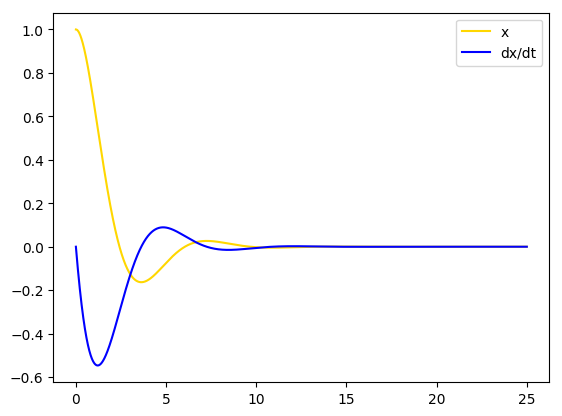

PyObject <matplotlib.legend.Legend object at 0x7f849ff2f850>

In [19]:
plot(conjunto,X,color ="gold", label="x")                   
legend()
plot(conjunto,Y,color ="blue", label="dx/dt")
legend()


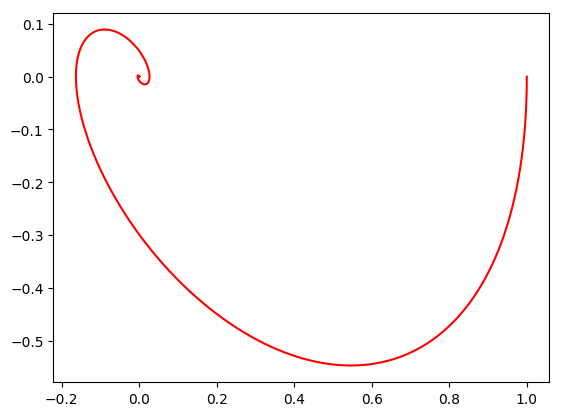

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f849fd29990>

In [24]:
#para el espacio fase
plot(X,Y,color="red")

In [3]:
function Runge(f,alfa,conjunto)
    x = alfa
     h = 0.001
     X=[]
     push!(X,x)
     for i in 2:length(conjunto)
        t = i*h
        t2 = i*h+h/2
        k1 = f(x,t)
        k2 = f(x+(h/2)*k1,t2)
        k3 = f(x+(h/2)*k2,t2)
        k4 = f(x+h*k3,t)
        x = x+(h/6)*(k1+2*k2+2*k3+k4)
        push!(X,x) 
     end
     return X
end

Runge (generic function with 1 method)

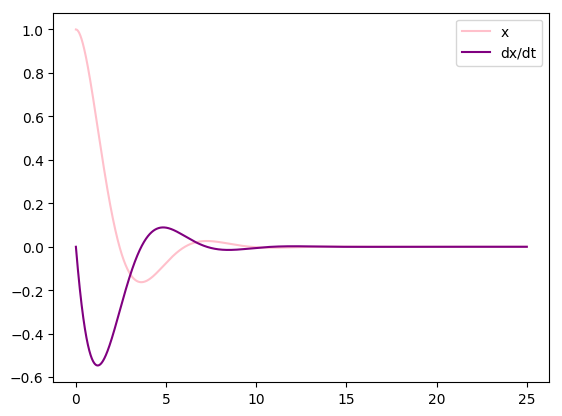

PyObject <matplotlib.legend.Legend object at 0x7f849fe4fe10>

In [23]:
vec = Runge(f,[1,0],conjunto)
U = map(x->x[1],vec)          
V = map(x->x[2],vec)
plot(conjunto,U,color ="pink", label="x")                   
legend()
plot(conjunto,V,color ="purple", label="dx/dt")
legend()

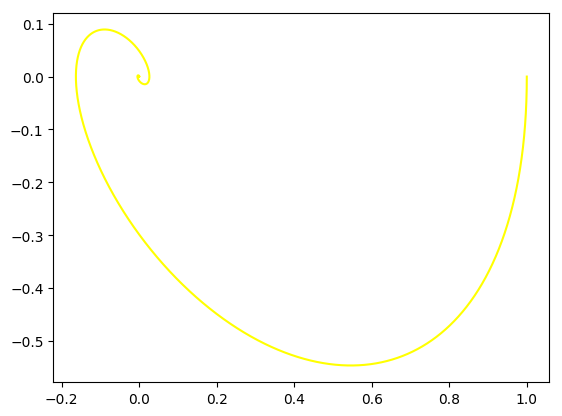

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f849fc78250>

In [25]:
plot(U,V,color="yellow") #espacio fase con runge

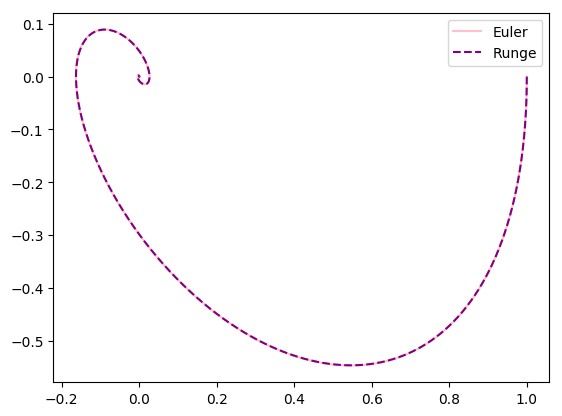

PyObject <matplotlib.legend.Legend object at 0x7f849f96d5d0>

In [28]:
plot(X,Y,color ="pink", label="Euler")                   
legend()
plot(U,V,color ="purple", label="Runge","--")
legend()

__Ejercicio 2:__ Resolver el péndulo simple:
$$l \ddot\theta=-g \sin(\theta),$$
usando Runge-Kutta orden 4. Gráficar muchas condiciones iniciales (lo mas facil es que sean aleatorias) en el espacio de fase usando $l=g=1$. Ajuste el rango de la gráfica para que se centre cerca del cero para que se puedan observar los dos tipos de movimiento presentes. Coménte e interprete las soluciones.

__Respuesta:__
$$\theta(t)=sin(t\omega)\alpha$$

Donde

$$\omega=\sqrt{\frac{g}{l}}$$

$\alpha=\theta0$ o condicion inicial

En este caso $\omega=1$

Entonces

$$\dot\theta=\alpha cos(t)$$


In [34]:
g(x,t)= [x[2],-sin(x[1])]            


g (generic function with 1 method)

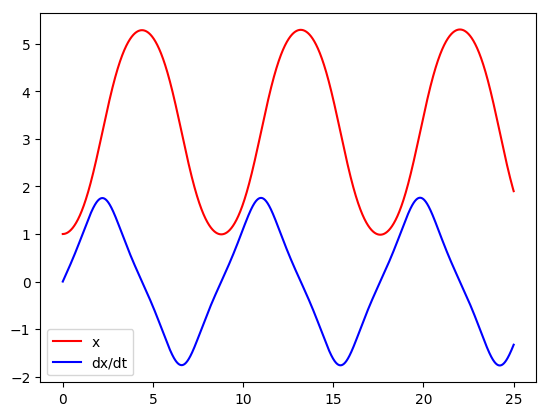

PyObject <matplotlib.legend.Legend object at 0x7f849f4d2e50>

In [35]:
vec = Euler(g,[1,0],conjunto)  
X1 = map(x->x[1],vec);          
X2 = map(x->x[2],vec);
plot(conjunto,X1, color ="red", label="x")                   
legend()
plot(conjunto,X2, color ="blue", label="dx/dt");
legend()

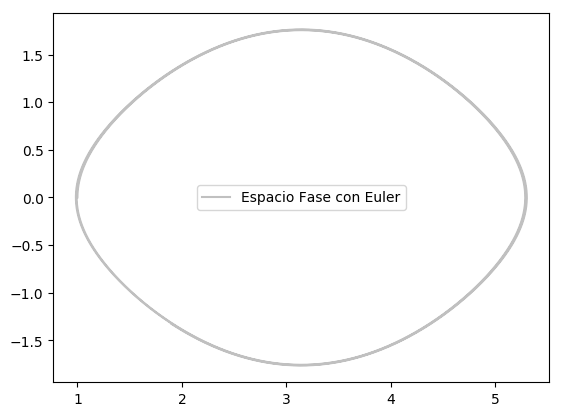

PyObject <matplotlib.legend.Legend object at 0x7f849f313090>

In [37]:
plot(X1,X2,color="silver",label="Espacio Fase con Euler")
legend()

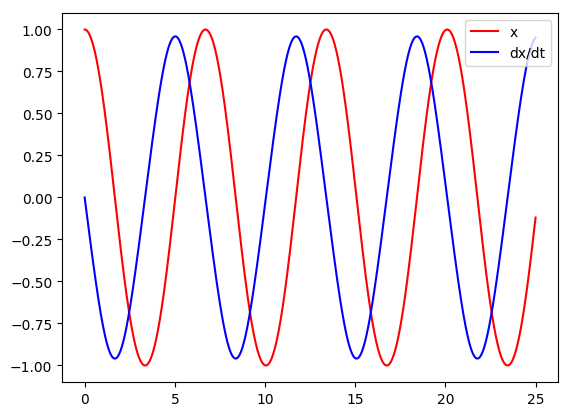

PyObject <matplotlib.legend.Legend object at 0x7f849f3afd90>

In [36]:
vec = Runge(g,[1,0],conjunto)    
RX1 = map(x->x[1],vec)         
RX2 = map(x->x[2],vec)
plot(conjunto,RX1, color ="red",label="x")  
legend()
plot(conjunto,RX2, color ="blue",label="dx/dt")
legend()

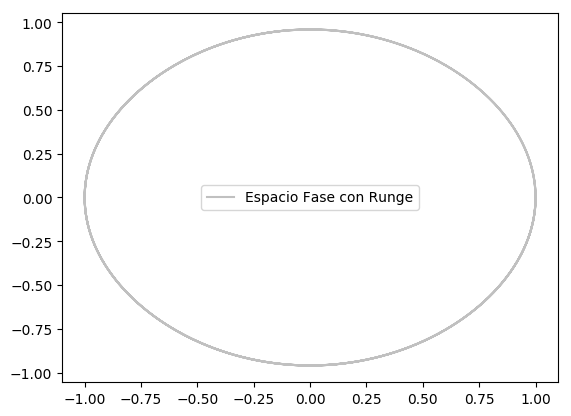

PyObject <matplotlib.legend.Legend object at 0x7f849f24f650>

In [38]:
plot(RX1,RX2,color="silver",label="Espacio Fase con Runge")
legend()

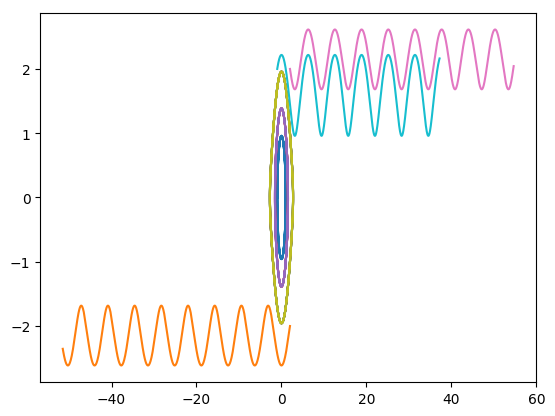

In [42]:
for i in 1:10
     w=rand(-2:2,2,1)    
    vec = Runge(g,w,conjunto)   
    RandomX1 = map(x->x[1],vec)          
    RandomX2 = map(x->x[2],vec)
    plot(RandomX1,RandomX2)
end

__Ejercicio 3:__ Comprobar numéricamente (con Runge-Kutta orden $4$) que en el sistema:
$$\frac{dx}{dt}=x^2-1,$$
hay dos _puntos fijos_, ubicados en $1$ y $-1$, compruebe además que el $1$ es un _repulsor_ y el $-1$ un _atractor_. Para hacer esto necesitará graficar muchas condiciones iniciales, generelas aleatoriamente y gráfiquelas en el espacio $(x(t),t)$.

In [59]:
Conjunto=linspace(-4,1,50)


50-element LinSpace{Float64}:
 -4.0,-3.89796,-3.79592,-3.69388,-3.59184,…,0.693878,0.795918,0.897959,1.0

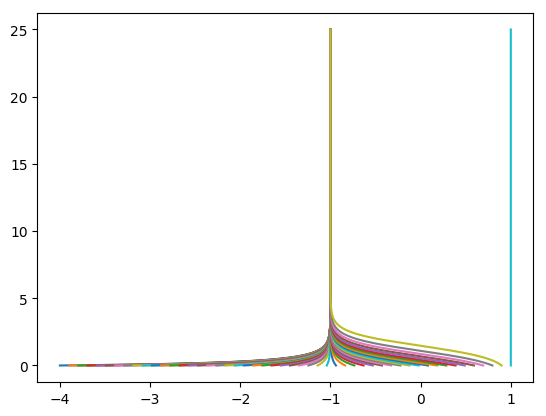

In [60]:
for i in 1:length(Conjunto) 
    vec = Runge((x,t)->x^2-1,Conjunto[i],conjunto)   
    plot(vec,conjunto)
end

__Ejercicio 4:__ También con Runge-Kutta orden $4, $Resuelva numéricamente el sistema:
$$\frac{dx}{dt}=x^2,$$
cual es el punto fijo único?, es un _atractor_ o un _repulsor_?. Utilice de igual forma muchas condiciones iniciales y gráfiquelas en el mismo espacio que en el ejercicio anterior.

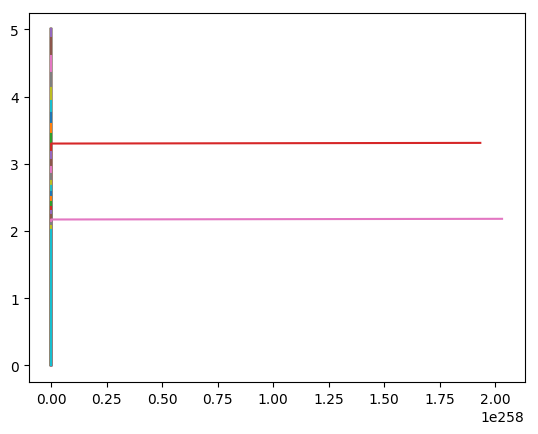

In [72]:
XX=linspace(-5,5,100) #voy a defeinir otro espacio de trabajo
for i in 1:length(XX)
    conjunto = 0:0.01:5
    vector = Runge((x,t)->x^2,XX[i],conjunto)   
    plot(vector,conjunto)
end

__Ejercicio 5:__ Resolver con Runge-Kutta orden $4$ el sistema de ecuaciones:
$$\frac{d\vec x}{dt}=\left(\begin{array}{cc} a & b \\ c & d \end{array}\right)\vec x,$$
donde $\vec x= \left(x(t),y(t)\right)^{\text{T}}.$
Grafique los espacios de fase tomando muchas condiciones iniciales aleatorias y fijando los rangos de los ejes alrededor del origen, de tal forma que se aprecie el compotamiento de las soluciones. Haga esto para los sistemas con:
* $a=c=1$, $b=d=0$
* $a=c=-1$, $b=d=0$
* $a=1$, $b=-2$, $c=d=0$
* $a=1$, $b=-0.5$, $c=d=0$
* $a=d=0$, $b=-c=1$
* $a=d=1$, $b=-c=1$
* $a=d=-1$, $b=-c=1$
* $a=d=-1$, $b=-c=-1$
* $a=b=1$, $b=4,c=-2$
* $a=b=d=-1$, $c=0$

In [1]:
function Matriz(a,b,c,d) #Es una funcion con la cual solo se evaluaran las abcd, me base en mi programa anterior oara esto.
M(x,t) = [a*x[1]+b*x[2],c*x[1]+d*x[2]] 
Conj=-10:0.01:5                        
for i in 1:50                          
    x0 = 0.5*rand(-10:10,2,1)           
    vec = Runge(M,x0,Conj) 
    X1 = map(x->x[1],vec)   
    X2= map(x->x[2],vec) 
    xlim(-5,5)
    ylim(-5,5)
    plot(X1,X2)    
end
end

Matriz (generic function with 1 method)

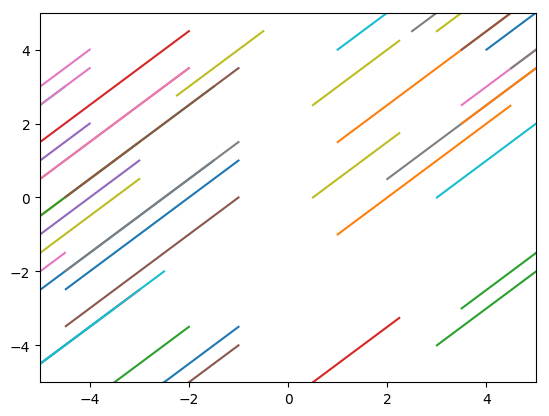

In [6]:
Matriz(1,0,1,0)

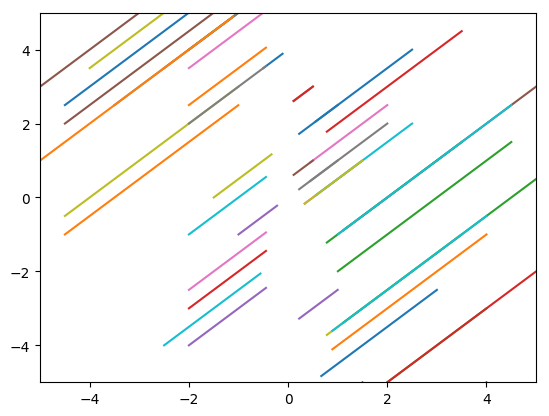

In [7]:
Matriz(-1,0,-1,0)

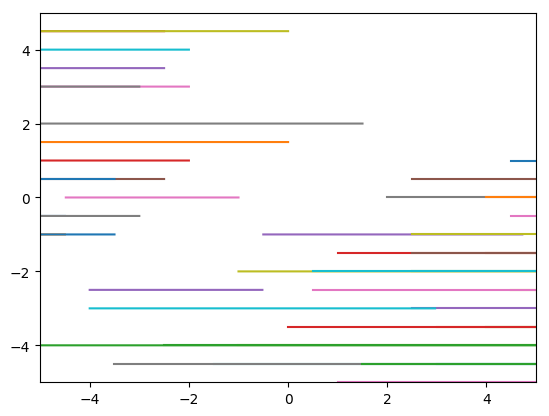

In [8]:
Matriz(1,-2,0,0)

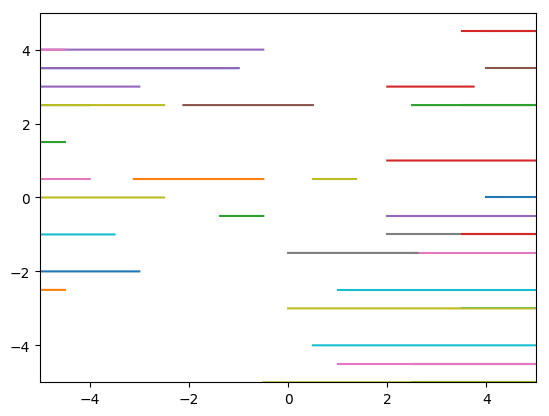

In [9]:
Matriz(1,-0.5,0,0)

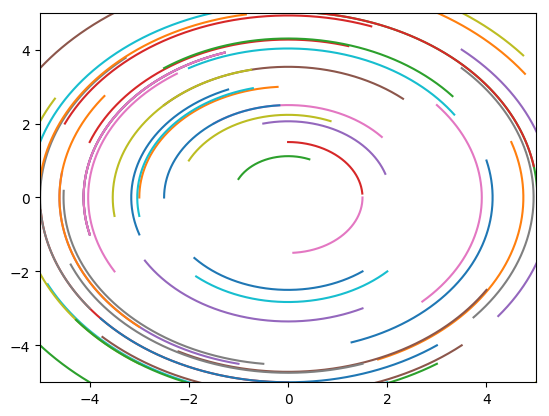

In [10]:
Matriz(0,1,-1,0)

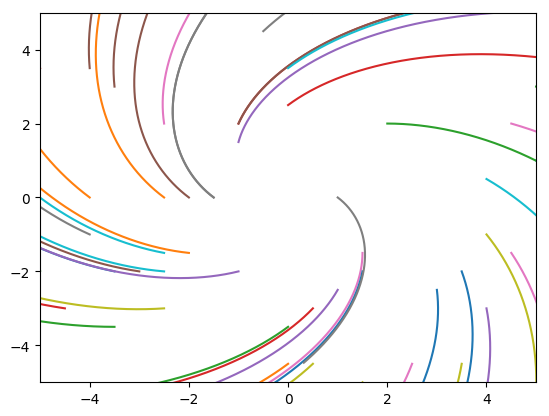

In [11]:
Matriz(1,1,-1,1)

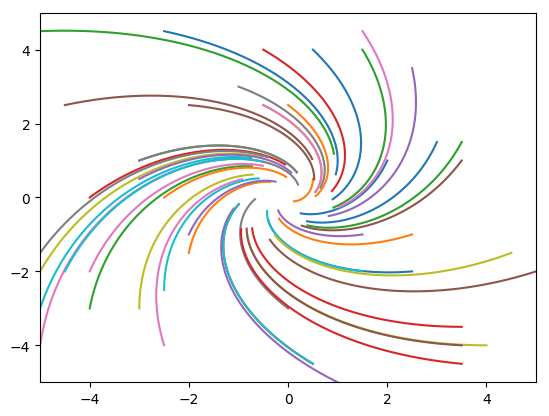

In [12]:
Matriz(-1,1,-1,-1)

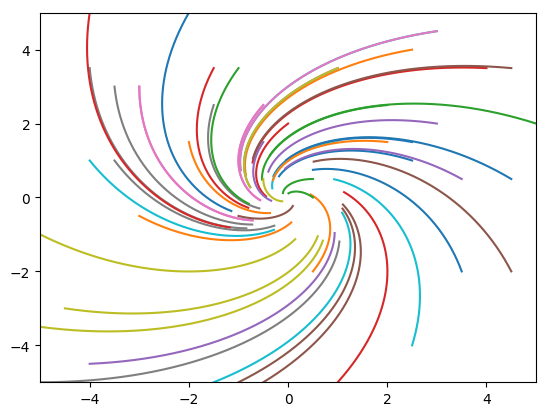

In [14]:
Matriz(-1,-1,1,-1)

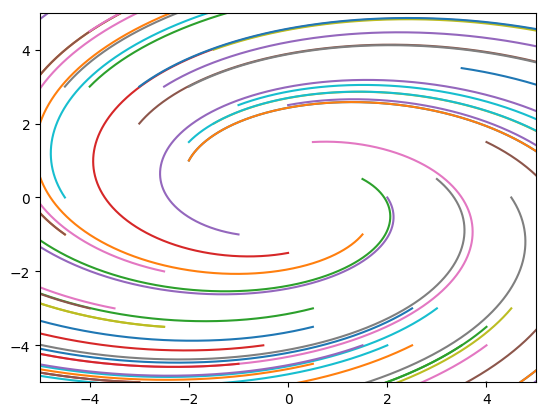

In [15]:
Matriz(1,4,-2,1)

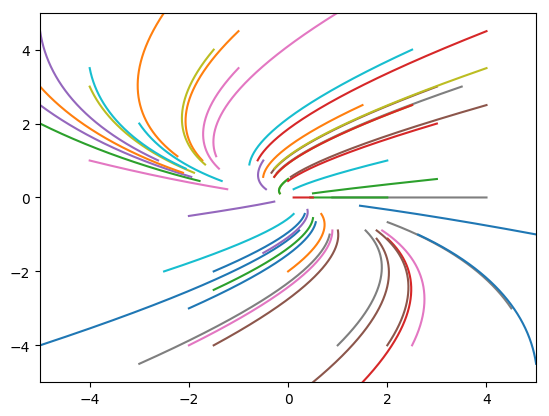

In [16]:
Matriz(-1,-1,0,-1)